In [1]:
!nvidia-smi

Fri Jun  7 11:39:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.10              Driver Version: 535.86.10    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        On  | 00000000:01:00.0  On |                  N/A |
|  0%   39C    P8              21W / 320W |    354MiB / 16376MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/mnt/linuxlab/home/mstaus1/Desktop/Shellfish_project_2024/Jupyter_local_code


In [3]:
!pip install -q git+https://github.com/ultralytics/ultralytics.git@main git+https://github.com/THU-MIG/yolov10.git supervision roboflow huggingface_hub bottleneck==1.3.6 numexpr==2.8.4

ERROR: Cannot install ultralytics 8.1.34 (from git+https://github.com/THU-MIG/yolov10.git) and ultralytics 8.2.28 (from git+https://github.com/ultralytics/ultralytics.git@main) because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [4]:
!mkdir -p {HOME}/weightsyolo
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 191M
-rw-r--r-- 1 mstaus1 students  80M May 26 11:53 yolov10b.pt
-rw-r--r-- 1 mstaus1 students 100M May 26 11:53 yolov10l.pt
-rw-r--r-- 1 mstaus1 students  64M May 26 11:54 yolov10m.pt
-rw-r--r-- 1 mstaus1 students  11M May 26 11:54 yolov10n.pt
-rw-r--r-- 1 mstaus1 students  32M May 26 11:54 yolov10s.pt
-rw-r--r-- 1 mstaus1 students 123M May 26 11:54 yolov10x.pt


## Download dataset from Roboflow Universe

In [8]:
!rm {HOME}/datasets -r -f
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Rvk9Clz4ote58KBvCfU3")
project = rf.workspace("curvy-oysters").project("oysters-cjt7n")
dataset = project.version(19).download("yolov8")

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/mnt/linuxlab/home/mstaus1/Desktop/Jupyter_for_Oysters/Shellfish_project_2024/Jupyter_local_code/datasets
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to oysters-19 in yolov8:: 100%|██████████████████████████████████████████████████████████| 5668/5668 [05:03<00:00, 18.69it/s]


**NOTE:**
Make sure the last 4 lines of the data.yaml file have the following format:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

If using a dataset from Roboflow Universe, run the command below. 👇🏻

In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [10]:
%cd {HOME}

!yolo task=detect mode=train epochs=10 batch=32 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/mnt/linuxlab/home/mstaus1/Desktop/Jupyter_for_Oysters/Shellfish_project_2024/Jupyter_local_code
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.9.7 torch-1.10.1+cu113 CUDA:0 (NVIDIA GeForce RTX 4080, 16071MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=/mnt/linuxlab/home/mstaus1/Desktop/Jupyter_for_Oysters/Shellfish_project_2024/Jupyter_local_code/weights/yolov10n.pt, data=/mnt/linuxlab/home/mstaus1/Desktop/Jupyter_for_Oysters/Shellfish_project_2024/Jupyter_local_code/datasets/oysters-19/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fr

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         92       1501      0.336      0.408      0.289      0.132

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size
       3/10      6.54G      1.665      1.644      1.671      1.611      2.115   
                 Class     Images  Instances      Box(P          R      mAP50  m/mnt/linuxlab/home/mstaus1/anaconda3/lib/python3.9/site-packages/ultralytics/utils/ops.py:862: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  index = index // nc
                 Class     Images  Instances      Box(P         

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         92       1501      0.602      0.512      0.562       0.32
Speed: 0.9ms preprocess, 2.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/train2
💡 Learn more at https://docs.ultralytics.com/modes/train


In [12]:
!ls {HOME}/runs/detect/train/

args.yaml					 results.csv
confusion_matrix_normalized.png			 results.png
confusion_matrix.png				 train_batch0.jpg
events.out.tfevents.1717766002.hpcl1-2.592736.0  train_batch1.jpg
F1_curve.png					 train_batch2.jpg
labels_correlogram.jpg				 val_batch0_labels.jpg
labels.jpg					 val_batch0_pred.jpg
P_curve.png					 val_batch1_labels.jpg
PR_curve.png					 val_batch1_pred.jpg
R_curve.png					 weights


/mnt/linuxlab/home/mstaus1/Desktop/Jupyter_for_Oysters/Shellfish_project_2024/Jupyter_local_code


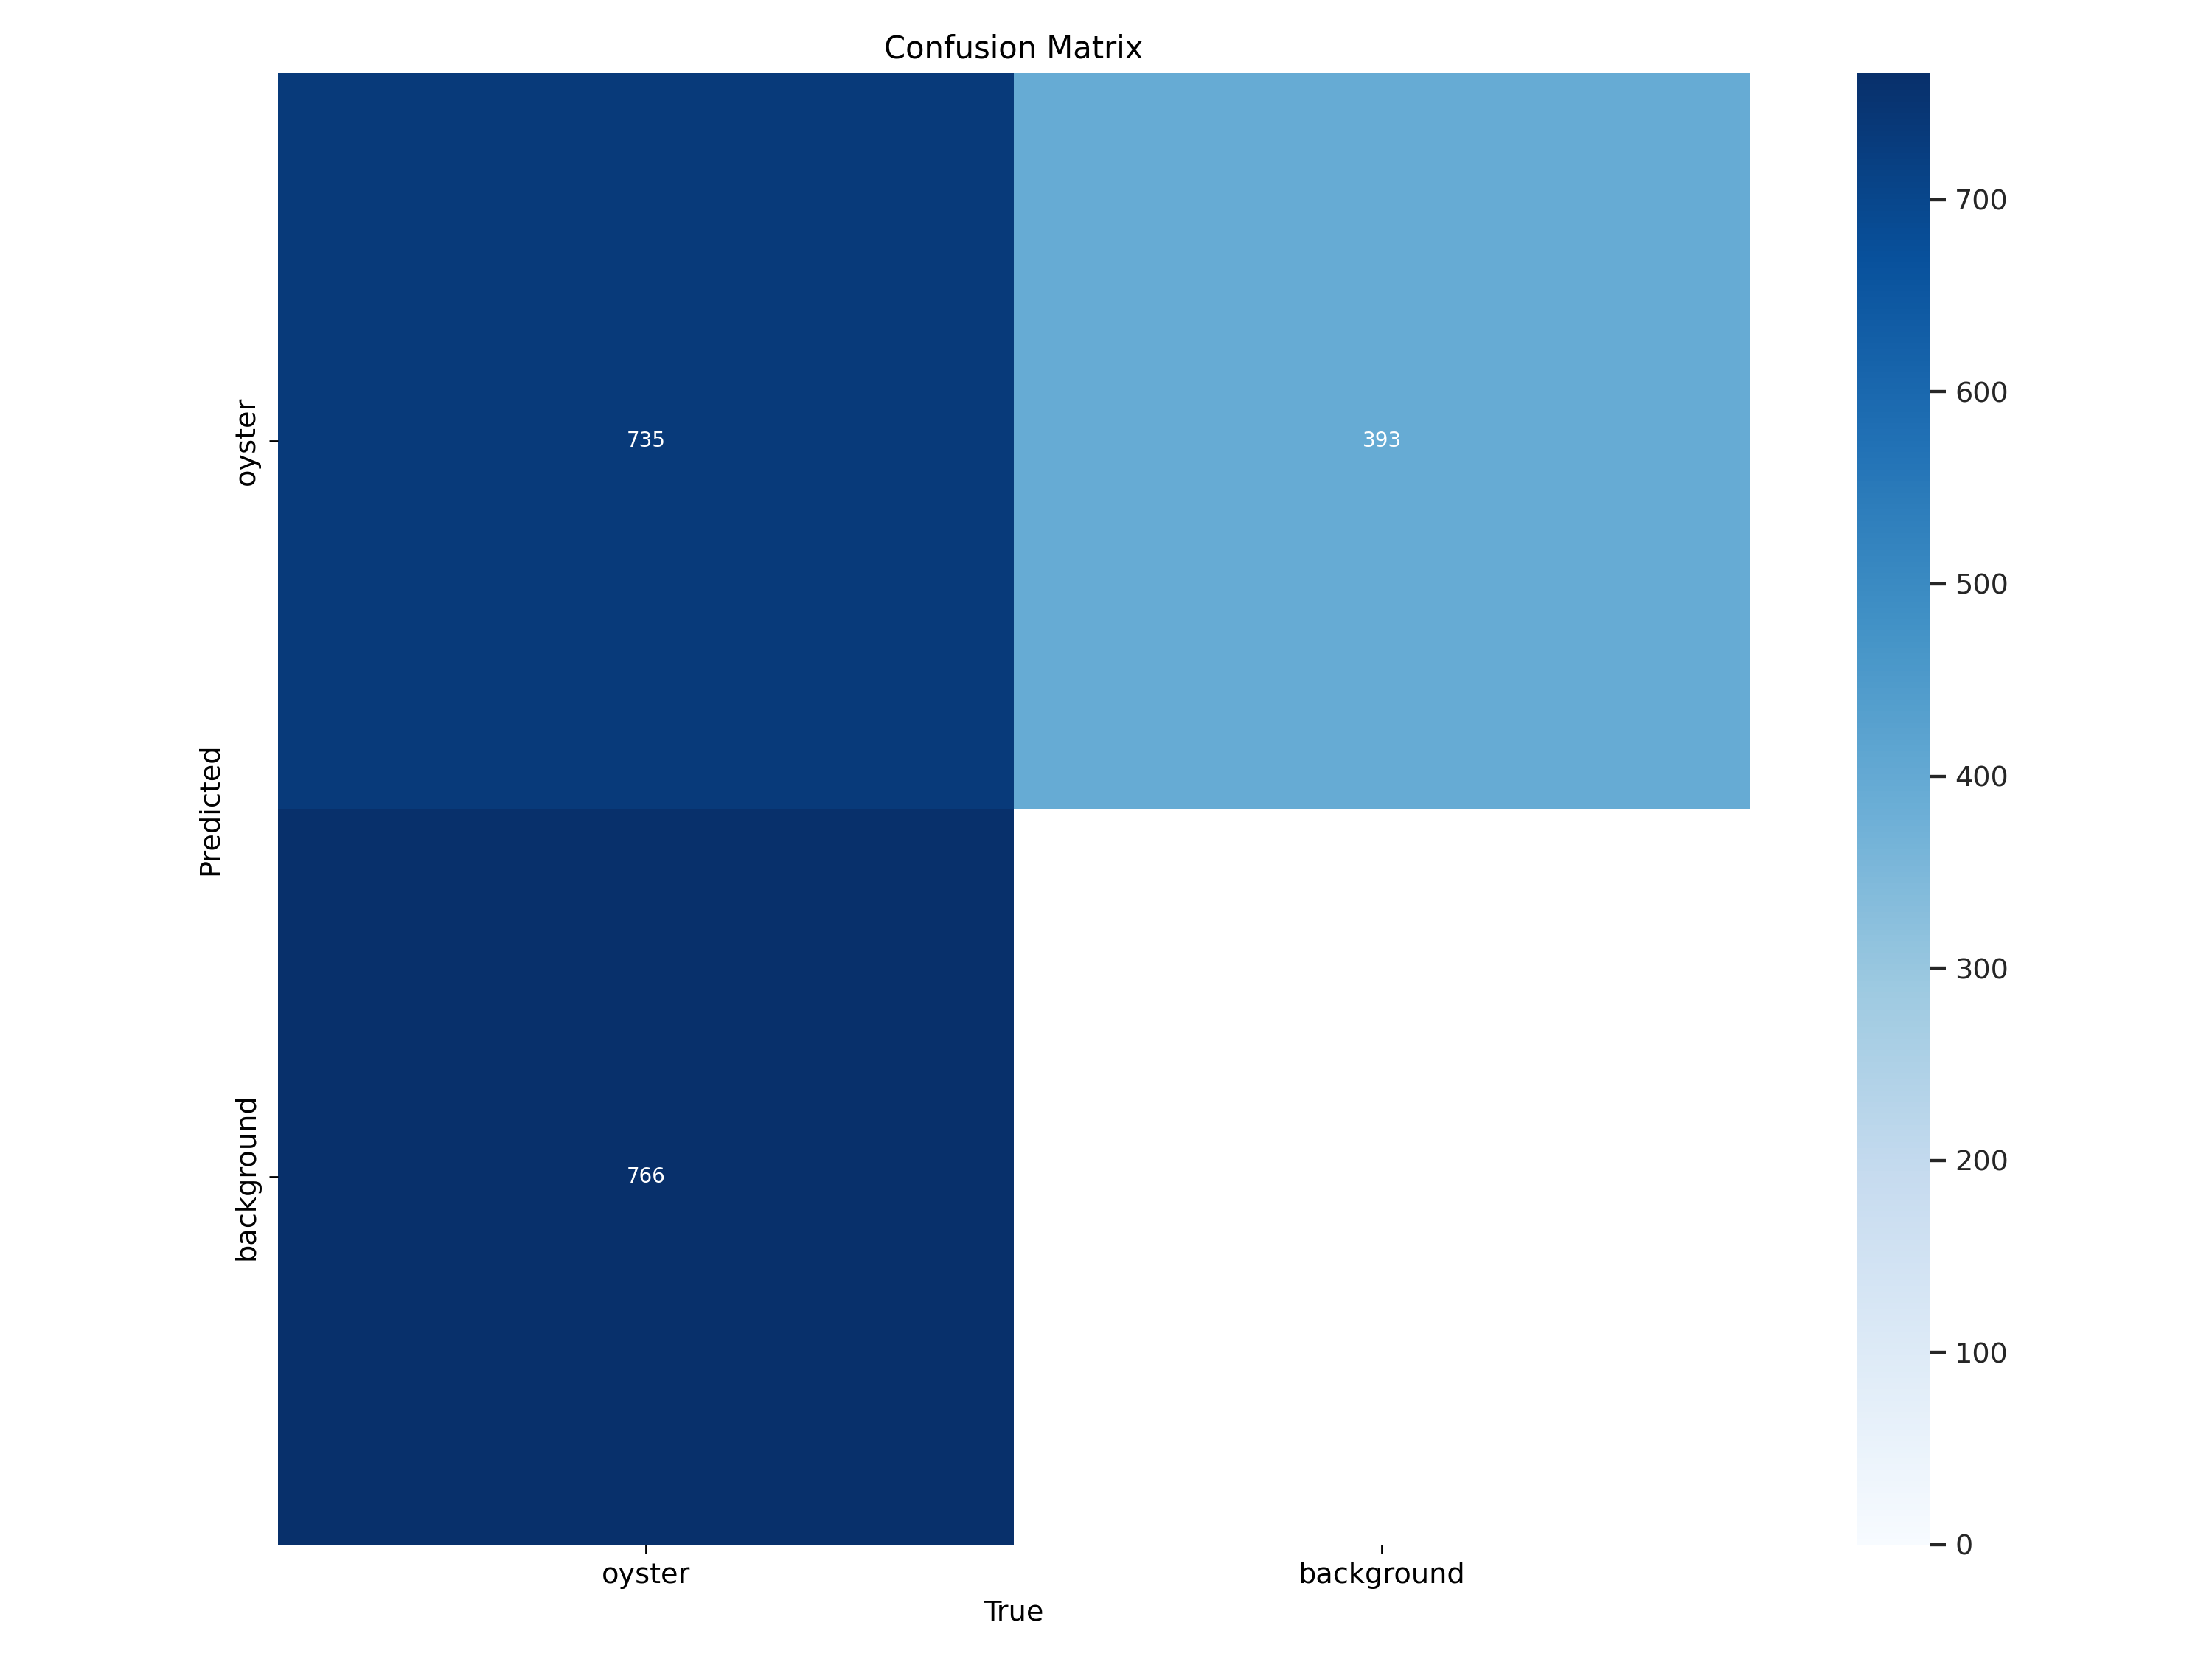

In [14]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/mnt/linuxlab/home/mstaus1/Desktop/Jupyter_for_Oysters/Shellfish_project_2024/Jupyter_local_code


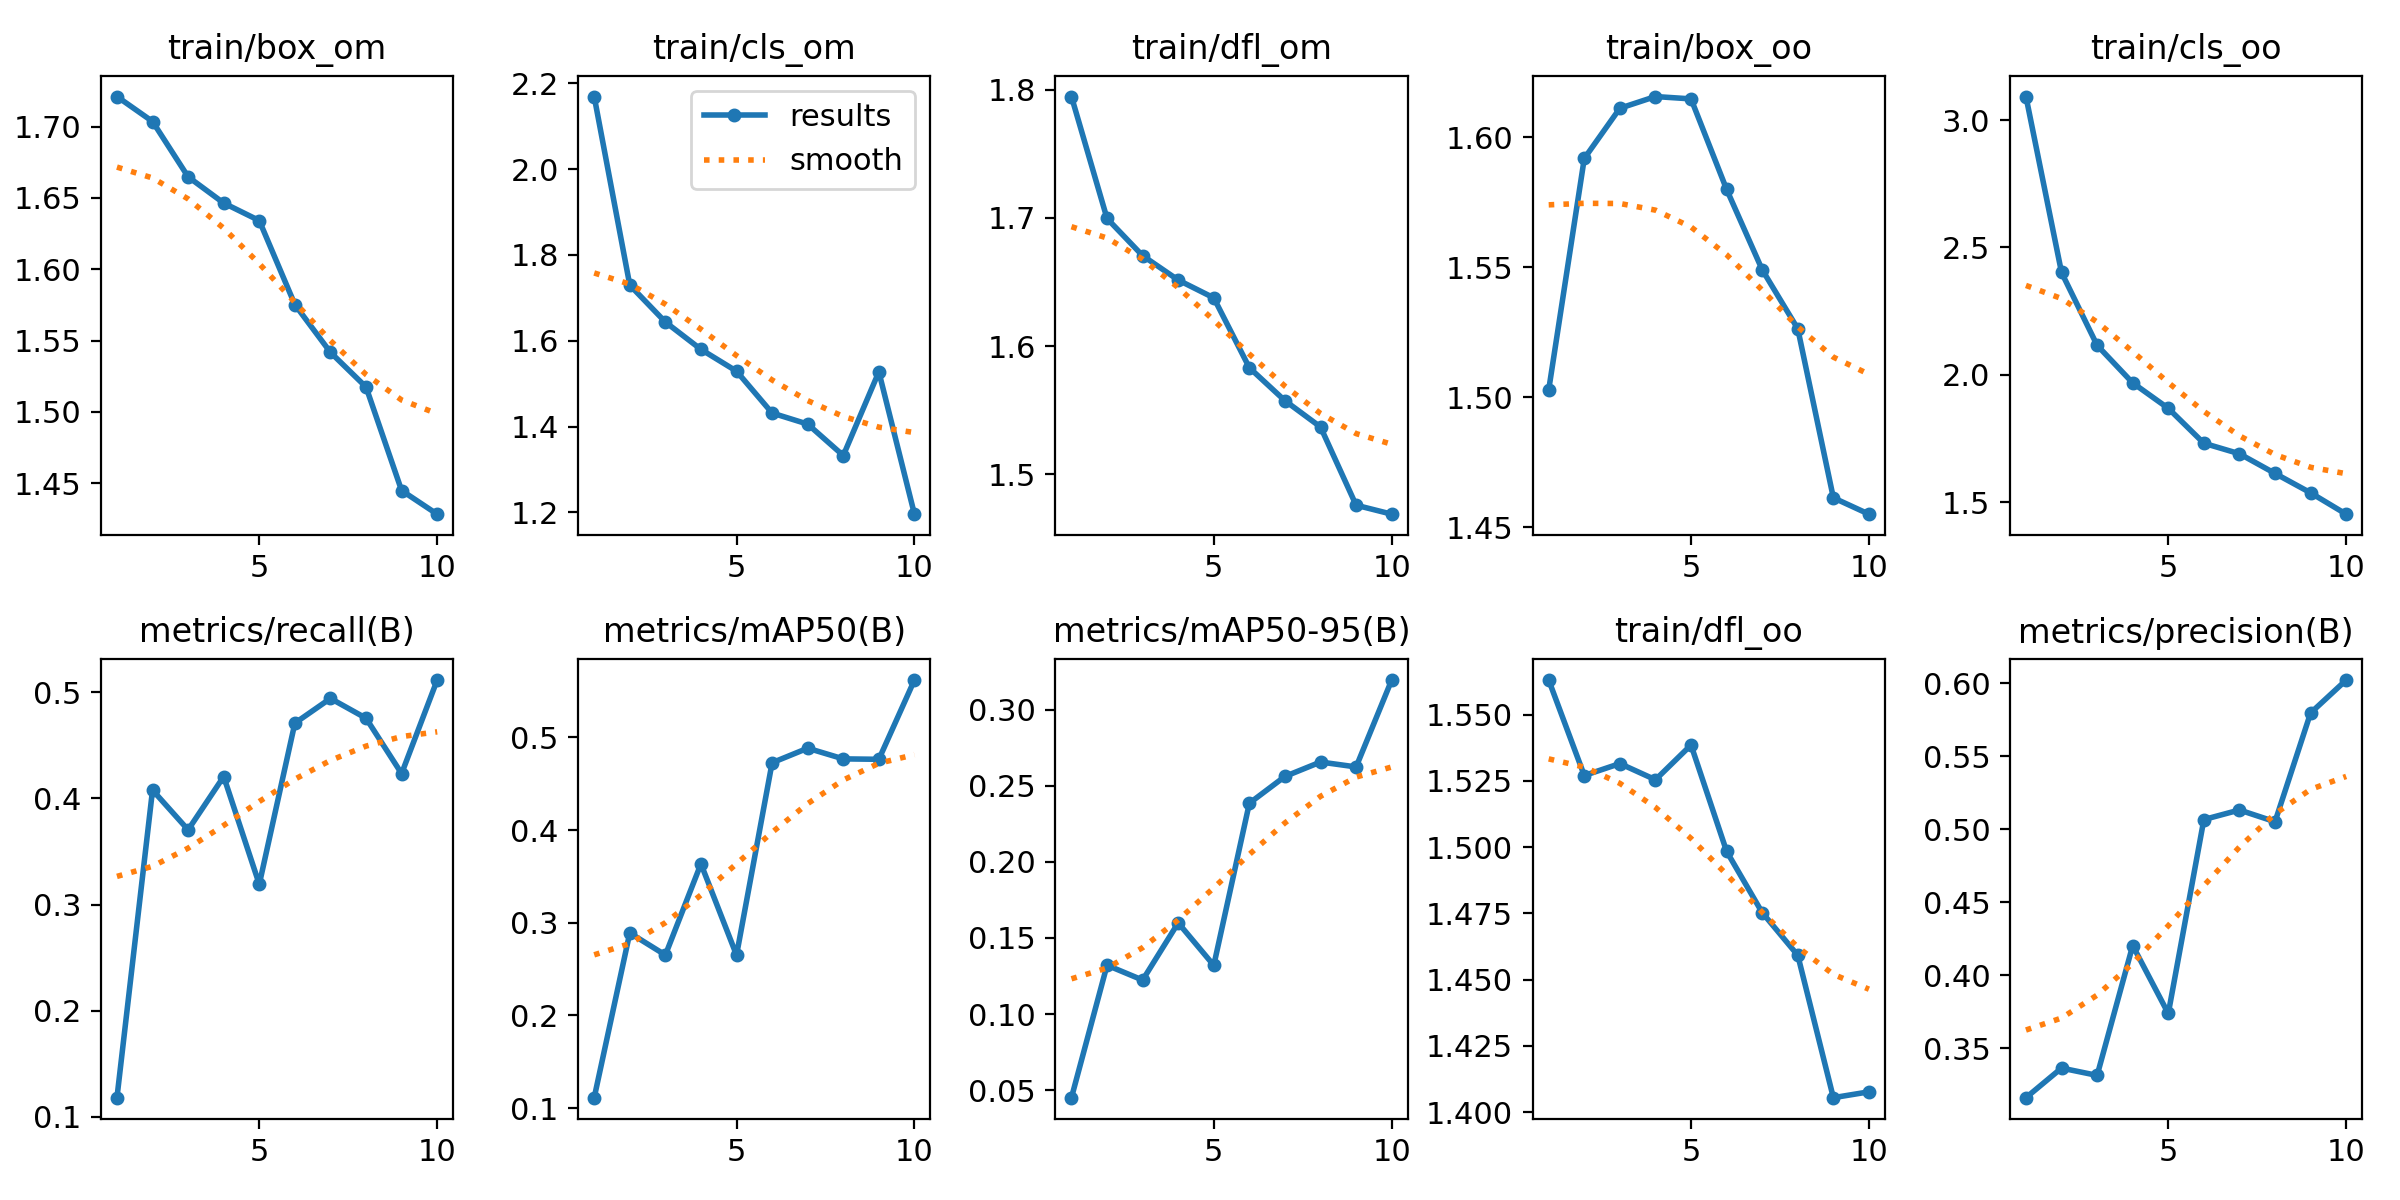

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [16]:
import cv2
import supervision as sv
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


0: 640x640 8 oysters, 3.0ms
Speed: 2.4ms preprocess, 3.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


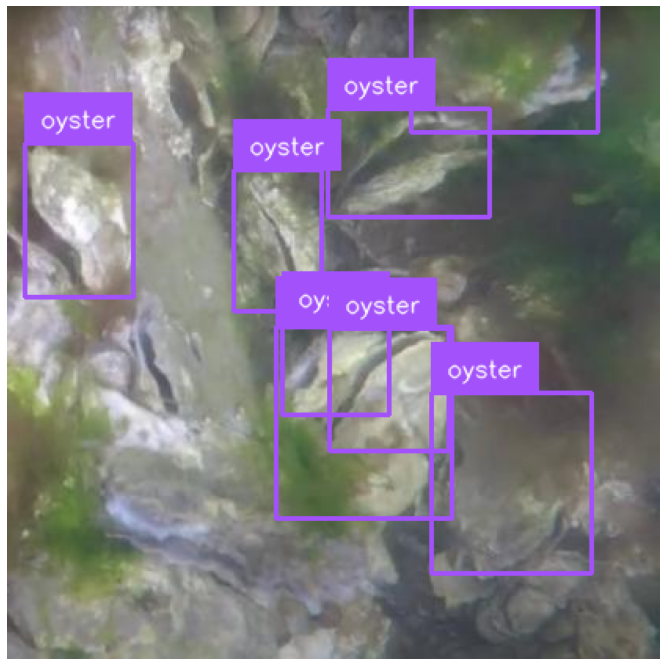

In [17]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)